In [6]:
import pandas as pd
from torch.nn.functional import softmax
import torch


pseudolab = pd.read_csv("pseudo/pseudolab.csv")
pseudolab

,sentence,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal,text
0,In 2019 a wave of anti-abortion laws swept thi...,6.635360,-2.915717,-0.175175,1.890639,-2.265393,-2.164053,-0.640354,In 2019 a wave of anti-abortion laws swept thi...
1,But these grabbed the public’s attention in a ...,-0.422903,-1.966259,0.220908,0.146967,-3.457461,-0.901608,6.126251,In 2019 a wave of anti-abortion laws swept thi...
2,Georgia banned abortion after about six weeks ...,1.859675,-3.230959,-0.389729,6.427304,-1.808647,-3.455705,-0.482240,In 2019 a wave of anti-abortion laws swept thi...
3,"Ohio, Mississippi, Louisiana and Kentucky did ...",0.327022,-2.367975,-1.594195,7.579478,-1.537600,-3.283216,-0.565419,In 2019 a wave of anti-abortion laws swept thi...
4,"Alabama went the furthest, banning virtually a...",6.683917,-2.563557,-0.671641,1.514271,-2.902210,-1.887146,-0.006093,In 2019 a wave of anti-abortion laws swept thi...
...,...,...,...,...,...,...,...,...,...
28359,"Jim Justice of West Virginia, a Republican, sa...",-0.826471,-2.144290,-0.996875,8.095543,-1.530808,-3.267610,-0.607475,WASHINGTON — The Biden administration has claw...
28360,The Biden administration had hoped to avoid sh...,3.889133,-3.152361,1.242280,2.615246,-2.932186,-2.632563,0.941492,WASHINGTON — The Biden administration has claw...
28361,"Late last year, the White House persuaded Ariz...",5.278596,-2.919935,-0.322822,2.819602,-2.090031,-2.463582,-0.311356,WASHINGTON — The Biden administration has claw...
28362,Yet administration officials are less concerne...,-0.367214,-2.063666,0.582598,0.422793,-3.704168,-1.220427,6.007252,WASHINGTON — The Biden administration has claw...


In [2]:
category_codes = {0: 'Claim',
 1: 'Concluding Statement',
 2: 'Counterclaim',
 3: 'Evidence',
 4: 'Lead',
 5: 'Position',
 6: 'Rebuttal'}
labels = list(zip(*category_codes.items()))[1]
labels

('Claim',
 'Concluding Statement',
 'Counterclaim',
 'Evidence',
 'Lead',
 'Position',
 'Rebuttal')

In [9]:
def softermax(row):
    return pd.Series([float(i) for i in softmax(torch.tensor(row.tolist()), dim=-1)])

probs = pseudolab[list(labels)].apply(softermax, 1)
probs.columns = labels
probs

,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
0,0.989267,0.000070,0.001090,0.008604,0.000135,0.000149,0.000685
1,0.001420,0.000303,0.002703,0.002511,0.000068,0.000880,0.992114
2,0.010251,0.000063,0.001081,0.987308,0.000262,0.000050,0.000986
3,0.000708,0.000048,0.000104,0.998722,0.000110,0.000019,0.000290
4,0.992139,0.000096,0.000634,0.005642,0.000068,0.000188,0.001233
...,...,...,...,...,...,...,...
28359,0.000133,0.000036,0.000112,0.999475,0.000066,0.000012,0.000166
28360,0.710977,0.000622,0.050390,0.198890,0.000775,0.001046,0.037300
28361,0.913836,0.000251,0.003374,0.078152,0.000576,0.000397,0.003413
28362,0.001686,0.000309,0.004359,0.003715,0.000060,0.000718,0.989153


<AxesSubplot:title={'center':'Frequency of Standard Deviation Values'}, ylabel='Frequency'>

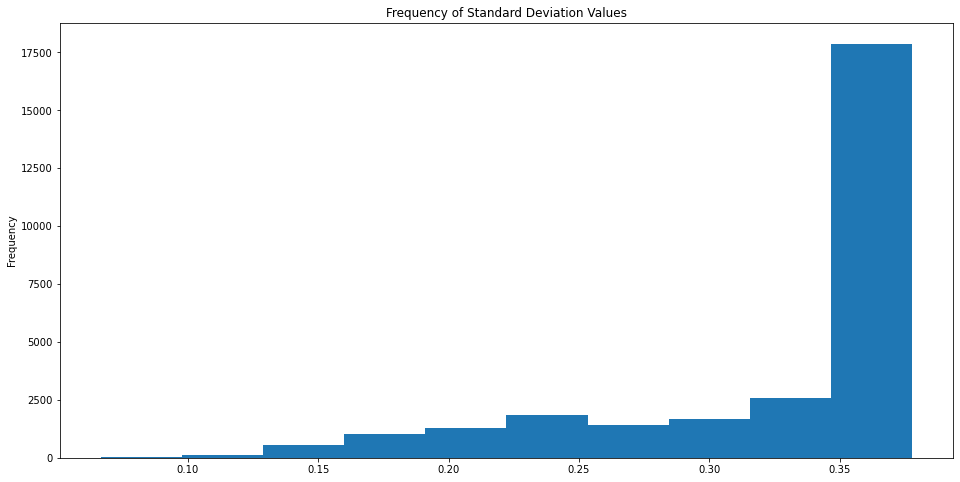

In [12]:
probs.std(axis=1).plot.hist(figsize=(16, 8), title="Frequency of Standard Deviation Values", xlabel="Standard Deviation")

<AxesSubplot:title={'center':'Frequency of Standard Deviation Values'}, ylabel='Frequency'>

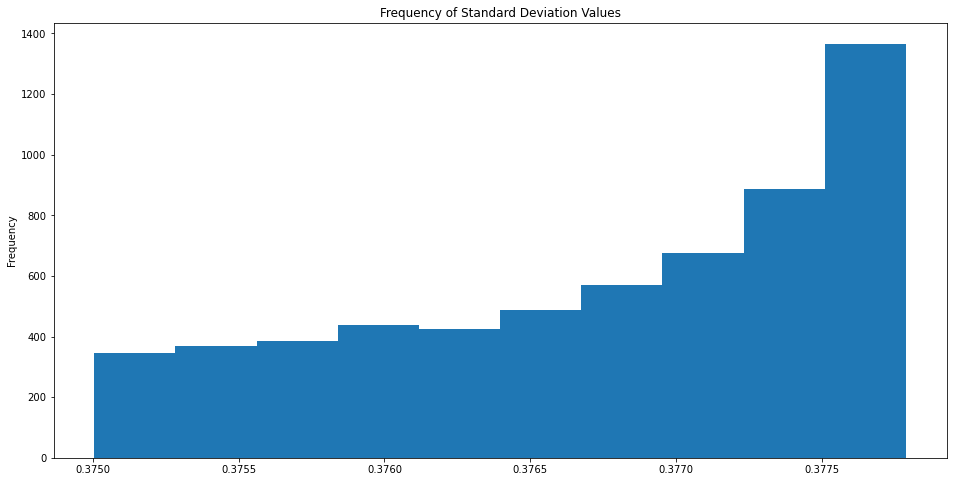

In [53]:
stdval = probs.std(axis=1)
stdval[stdval > 0.375].plot.hist(figsize=(16, 8), title="Frequency of Standard Deviation Values", xlabel="Standard Deviation")

In [70]:
stdval.sort_values().iloc[5772]

0.27370445963464063

In [69]:
stdval.sort_values().iloc[:5772]

15187    0.066603
22911    0.078197
21059    0.082369
11917    0.084615
951      0.086450
           ...   
22223    0.273613
21740    0.273642
2545     0.273655
17972    0.273680
17038    0.273694
Length: 5772, dtype: float64

In [72]:
probs.iloc[stdval[stdval < stdval.sort_values().iloc[5771:5773].mean()].index]

,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
5,0.514954,0.001218,0.159456,0.234271,0.000799,0.002552,0.086749
7,0.321800,0.009686,0.081885,0.321841,0.001232,0.025273,0.238284
8,0.263717,0.000305,0.008866,0.719344,0.000846,0.000346,0.006575
24,0.573191,0.001067,0.090636,0.306630,0.005605,0.001506,0.021365
26,0.240458,0.002148,0.017857,0.655317,0.000443,0.001450,0.082327
...,...,...,...,...,...,...,...
28318,0.693529,0.000344,0.013239,0.279450,0.000429,0.000300,0.012708
28326,0.373318,0.000942,0.022704,0.567122,0.002387,0.001060,0.032468
28335,0.387668,0.001515,0.007292,0.552721,0.044596,0.001527,0.004681
28343,0.167872,0.001495,0.106281,0.691637,0.007723,0.003931,0.021061


In [74]:
pseudolab.iloc[stdval[stdval < stdval.sort_values().iloc[5771:5773].mean()].index]

,sentence,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal,text
5,Though most of these laws were quickly blocked...,3.072332,-2.974758,1.900025,2.284735,-3.396204,-2.234768,1.291276,In 2019 a wave of anti-abortion laws swept thi...
7,Netflix and Disney spoke out.,1.826771,-1.676480,0.458154,1.826899,-3.738378,-0.717438,1.526303,In 2019 a wave of anti-abortion laws swept thi...
8,The actress Alyssa Milano even tried to get a ...,3.501358,-3.260820,0.108704,4.504820,-2.240559,-3.135539,-0.190208,In 2019 a wave of anti-abortion laws swept thi...
24,Among the political realities at play: Some ba...,3.239783,-3.046271,1.395416,2.614205,-1.387824,-2.701893,-0.049685,In 2019 a wave of anti-abortion laws swept thi...
26,You can bet these lawmakers will be watching t...,2.548542,-2.169428,-0.051605,3.551116,-3.748481,-2.562304,1.476697,In 2019 a wave of anti-abortion laws swept thi...
...,...,...,...,...,...,...,...,...,...
28318,The property is also a short distance — two mi...,4.472905,-3.135210,0.514249,3.563934,-2.914044,-3.271267,0.473365,"Floral Park, about two miles from downtown San..."
28326,The three bedrooms on this level are off a hal...,3.028955,-2.953272,0.229086,3.447098,-2.023364,-2.835640,0.586770,"Floral Park, about two miles from downtown San..."
28335,WASHINGTON — The Biden administration has claw...,2.986798,-2.558136,-0.986604,3.341501,0.824299,-2.550111,-1.429799,WASHINGTON — The Biden administration has claw...
28343,"“This is better,” said Representative Ritchie ...",1.772943,-2.948144,1.315834,3.188805,-1.306030,-1.981400,-0.302816,WASHINGTON — The Biden administration has claw...


In [79]:
pd.factorize(pseudolab.sentence)[0]

array([    0,     1,     2, ..., 26681, 26682, 26683], dtype=int64)

In [82]:
category_codes = {0: 'Claim',
 1: 'Concluding Statement',
 2: 'Counterclaim',
 3: 'Evidence',
 4: 'Lead',
 5: 'Position',
 6: 'Rebuttal'}
labels = list(zip(*category_codes.items()))[1]

def softermax(row):
    return pd.Series([float(i) for i in softmax(torch.tensor(row.tolist()), dim=-1)])

probs = pseudolab[list(labels)].apply(softermax, 1)
probs.columns = labels
stdval = probs.std(axis=1)
stdval[stdval < stdval.sort_values().iloc[5771:5773].mean()].index

Int64Index([    5,     7,     8,    24,    26,    27,    33,    36,    44,
               45,
            ...
            28256, 28257, 28259, 28283, 28289, 28318, 28326, 28335, 28343,
            28360],
           dtype='int64', length=5772)